In [87]:
import pandas as pd
import numpy as np

rating = pd.read_csv('ratings.csv')

rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [88]:
rating['rating'].unique

<bound method Series.unique of 0           5.0
1           3.5
2           5.0
3           5.0
4           3.5
           ... 
25000090    4.5
25000091    2.5
25000092    2.0
25000093    4.0
25000094    5.0
Name: rating, Length: 25000095, dtype: float64>

In [4]:
links = pd.read_csv('links.csv')

links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
genome_score = pd.read_csv('genome-scores.csv')

genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [175]:
movie = pd.read_csv('movies.csv')

movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [7]:
tags = pd.read_csv('tags.csv')

tags.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [8]:
train_data = pd.merge(rating, movie, on='movieId')
train_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


# Exploring the Data Distribution

Text(0, 0.5, 'Rating')

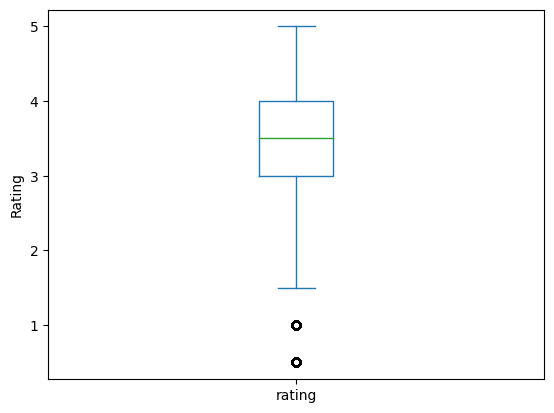

In [9]:
ax = (train_data['rating']).plot.box()
ax.set_ylabel('Rating')

In [10]:
train_data['rating'].value_counts()

rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

In [176]:
# Split the genres column into a list of individual genres.
genres_first_level = movie['genres'].str.split('|')

genres_list = []

for first_level in genres_first_level:
    for genre in first_level:
        if genre not in genres_list:
            genres_list.append(genre)          

for i in range(0, len(genres_first_level)):
    temp = genres_first_level[i]
    for genre in temp:
        movie.loc[i, genre] = 1

movie.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
movie['sum'] = ''

In [178]:
movie.columns

Index(['movieId', 'title', 'genres', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)', 'sum'],
      dtype='object')

In [179]:
genres = ['Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller',
       'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)']
for i in range(0, len(movie['movieId'])): 
    temp = ''
    for genre in genres:
        if pd.notna(movie.loc[i, genre]):
            temp += '1'
        else:
            temp += '0'
    movie.loc[i, 'sum'] = temp

In [180]:
movie['sum'] = pd.to_numeric(movie['sum'], errors='coerce')

We created a 2-symbol code that indicates the membership of a film in the defined genres (1 - belongs to a genre, 0 - does not). The first symbol represents 'Adventure', and the second symbol represents 'Animation', and so on (referring to the genres list). We now need to identify the correlation of films to each other based on their genre features.

In [181]:
movie

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),sum
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111000000000000000
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101000000000000000
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100000000000000
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10110000000000000
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),Drama,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000000000
62419,209159,Window of the Soul (2001),Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100000
62420,209163,Bad Poems (2018),Comedy|Drama,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10010000000000000
62421,209169,A Girl Thing (2001),(no genres listed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


In [97]:
genres_count = {}

for genre in genres_list:
    genres_count[genre] = 0

for genre in genres_list:
    value_counts = movie[genre].value_counts()
    value_to_count = 1
    count_of_value = value_counts.get(value_to_count)
    genres_count[genre] = count_of_value
    
genres_count

{'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Fantasy': 2731,
 'Romance': 7719,
 'Drama': 25606,
 'Action': 7348,
 'Crime': 5319,
 'Thriller': 8654,
 'Horror': 5989,
 'Mystery': 2925,
 'Sci-Fi': 3595,
 'IMAX': 195,
 'Documentary': 5605,
 'War': 1874,
 'Musical': 1054,
 'Western': 1399,
 'Film-Noir': 353,
 '(no genres listed)': 5062}

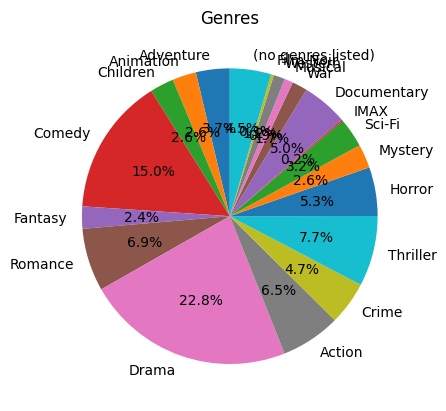

<Figure size 4000x4000 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

values = genres_count.values()
labels = genres_count.keys()

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title (optional)
plt.title('Genres')

plt.figure(figsize=(40, 40))

# Show the plot
plt.show()

We can notice several dominant genres in the movie dataset, such as comedy, drama, thriller, and action

In [19]:
# Split the genres column into a list of individual genres.
genres_first_level = train_data['genres'].str.split('|')

genres_list = []

for first_level in genres_first_level:
    for genre in first_level:
        if genre not in genres_list:
            genres_list.append(genre)          

# for genre in genres_list:
#     train_data[genre] = 0

for i in range(0, len(genres_first_level)):
    temp = genres_first_level[i]
    for genre in temp:
        train_data.loc[i, genre] = 1

train_data.head()

,userId,movieId,rating,timestamp,title,genres,Comedy,Crime,Drama,Thriller,...,Western,Fantasy,Mystery,Children,Action,Documentary,Animation,Horror,IMAX,(no genres listed)
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
genres_count = {}

for genre in genres_list:
    genres_count[genre] = 0

for genre in genres_list:
    value_counts = train_data[genre].value_counts()
    value_to_count = 1
    count_of_value = value_counts.get(value_to_count)
    genres_count[genre] = count_of_value

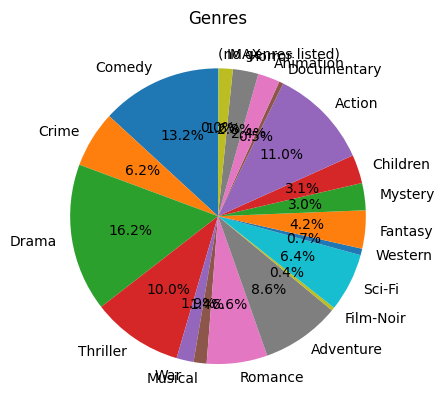

<Figure size 4000x4000 with 0 Axes>

In [21]:
values = genres_count.values()
labels = genres_count.keys()

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title (optional)
plt.title('Genres')

plt.figure(figsize=(40, 40))

# Show the plot
plt.show()

In [22]:
genres_count = {}

for genre in genres_list:
    genres_count[genre] = 0
    
rating_more_than_4 = train_data[train_data['rating'] >= 4.0]


for genre in genres_list:
    value_counts = rating_more_than_4[genre].value_counts()
    value_to_count = 1
    count_of_value = value_counts.get(value_to_count)
    genres_count[genre] = count_of_value
    
genres_count

{'Comedy': 4047049,
 'Crime': 2342984,
 'Drama': 6096563,
 'Thriller': 3300125,
 'War': 772242,
 'Musical': 488768,
 'Romance': 2250931,
 'Adventure': 2843633,
 'Film-Noir': 166847,
 'Sci-Fi': 2048318,
 'Western': 250982,
 'Fantasy': 1379720,
 'Mystery': 1114410,
 'Children': 973141,
 'Action': 3465390,
 'Documentary': 186565,
 'Animation': 859891,
 'Horror': 774089,
 'IMAX': 547743,
 '(no genres listed)': 10500}

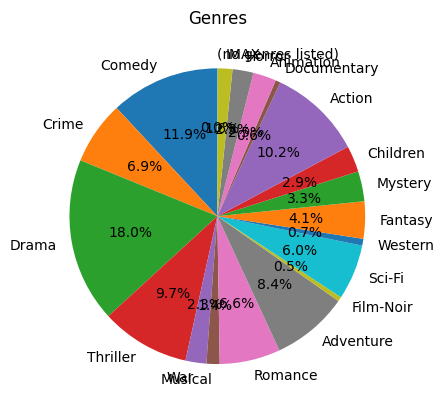

<Figure size 4000x4000 with 0 Axes>

In [23]:
values = genres_count.values()
labels = genres_count.keys()

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title (optional)
plt.title('Genres')

plt.figure(figsize=(40, 40))

# Show the plot
plt.show()

We can observe several significant changes when comparing three different graphics. For instance, in the pie chart representing movies in our streaming platform dataset, dramas account for nearly 23% of the total. However, in the pie chart based on the merged 'train_data' (which combines movie and rating datasets), dramas only make up 16.2%. This indicates that viewers have watched 16.2% of dramas compared to other genres.The third graphic represents the percentage of movies with a rating above 4, where dramas account for 18%. 

For the genre comedy, the situation differs. It takes up 15%, 13.2%, and 11.9% in the three respective graphics. This suggests that finding a good drama is slightly easier than finding a good comedy.

Text(0.5, 0, 'Rating')

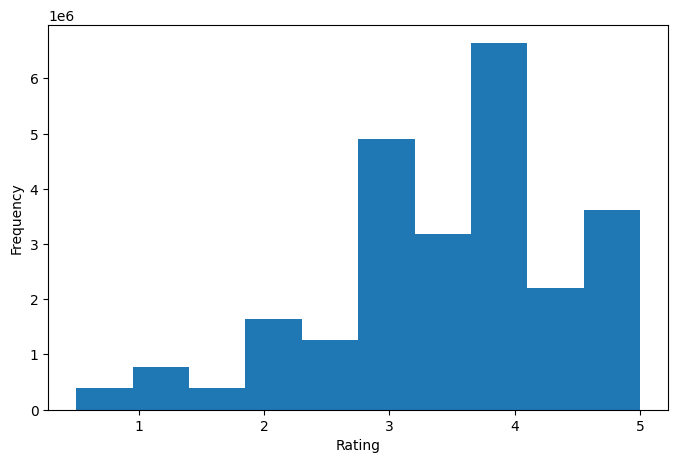

In [24]:
ax = train_data['rating'].plot.hist(figsize=(8, 5))
ax.set_xlabel('Rating')

We can notice that it is more common to rate a film as a good or passable

In [25]:
train_data.shape

(25000095, 26)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   movieId             int64  
 2   rating              float64
 3   timestamp           int64  
 4   title               object 
 5   genres              object 
 6   Comedy              float64
 7   Crime               float64
 8   Drama               float64
 9   Thriller            float64
 10  War                 float64
 11  Musical             float64
 12  Romance             float64
 13  Adventure           float64
 14  Film-Noir           float64
 15  Sci-Fi              float64
 16  Western             float64
 17  Fantasy             float64
 18  Mystery             float64
 19  Children            float64
 20  Action              float64
 21  Documentary         float64
 22  Animation           float64
 23  Horror              float64
 24  IMAX                fl

In [27]:
train_data['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [134]:
# To exclude movies with less than 1000 votes from the dataset

comment_counts = pd.DataFrame(train_data["title"].value_counts())
rare_movies = comment_counts[comment_counts["count"] <= 1000].index
common_movies = train_data[~train_data["title"].isin(rare_movies)]

common_movies.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'Comedy',
       'Crime', 'Drama', 'Thriller', 'War', 'Musical', 'Romance', 'Adventure',
       'Film-Noir', 'Sci-Fi', 'Western', 'Fantasy', 'Mystery', 'Children',
       'Action', 'Documentary', 'Animation', 'Horror', 'IMAX',
       '(no genres listed)'],
      dtype='object')

In [99]:
if common_movies['title'].isin(['Purge: Anarchy, The (2014)']).any():
    print('The movie exists in the DataFrame.')
else:
    print('The movie does not exist in the DataFrame.')

The movie does not exist in the DataFrame.


In [100]:
train_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'Comedy',
       'Crime', 'Drama', 'Thriller', 'War', 'Musical', 'Romance', 'Adventure',
       'Film-Noir', 'Sci-Fi', 'Western', 'Fantasy', 'Mystery', 'Children',
       'Action', 'Documentary', 'Animation', 'Horror', 'IMAX',
       '(no genres listed)'],
      dtype='object')

In [101]:
# Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns, and the ratings as values

user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.head(5)

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),...,Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
import random

unique_userId = train_data['userId'].nunique()

random_userId = random.randint(1, unique_userId)

In [192]:
choosen_rating = [4, 4.5, 5]

random_user_movie = common_movies[(common_movies["userId"] == random_userId) & (common_movies["rating"].isin(choosen_rating))]
random_user_movie = random_user_movie.sort_values(by="timestamp", ascending=False).reset_index()
random_user_movie.head()

,index,userId,movieId,rating,timestamp,title,genres,Comedy,Crime,Drama,...,Western,Fantasy,Mystery,Children,Action,Documentary,Animation,Horror,IMAX,(no genres listed)
0,16635971,128541,783,4.0,844770012,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
1,17072347,128541,52,4.0,844769990,Mighty Aphrodite (1995),Comedy|Drama|Romance,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21428764,128541,4,4.0,844769979,Waiting to Exhale (1995),Comedy|Drama|Romance,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17085270,128541,194,5.0,844769978,Smoke (1995),Comedy|Drama,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10349438,128541,608,5.0,844769940,Fargo (1996),Comedy|Crime|Drama|Thriller,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
first_movie = random_user_movie[random_user_movie["rating"] == 5.0]["title"]
first_movie.values

array(['Smoke (1995)', 'Fargo (1996)', 'Sense and Sensibility (1995)',
       'Usual Suspects, The (1995)'], dtype=object)

In [195]:
for movie_user in first_movie:
    
    movie_item = user_movie_df[movie_user]
    movie_item_genres = movie[movie['title']==movie_user].iloc[0]['sum']
    recommended = user_movie_df.corrwith(movie_item).sort_values(ascending=False)
    movie_genres = movie[movie['sum']==movie_item_genres]['title']
    correlated = recommended[recommended>0.5]
    
    movie_from_genres_compare = movie_genres.values
    movie_from_rating_compare = correlated.index

    for movie_iteration in movie_from_rating_compare:
        if movie_iteration in movie_from_genres_compare and movie_iteration not in first_movie.values:
            print(movie_iteration)

It's Kind of a Funny Story (2010)
Sunshine Cleaning (2008)
Pride and Prejudice (1995)


In [145]:
print('Mask, The (1994) has mean rating', train_data[train_data['title'] == 'Mask, The (1994)']['rating'].mean())
print('Whisper of the Heart (Mimi wo sumaseba) (1995) has mean rating', train_data[train_data['title'] == 'Whisper of the Heart (Mimi wo sumaseba) (1995)']['rating'].mean())

Mask, The (1994) has mean rating 3.183039195863782
Whisper of the Heart (Mimi wo sumaseba) (1995) has mean rating 3.991433724075744


In [190]:
movie.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),sum
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111000000000000000
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10101000000000000000
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100000000000000
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10110000000000000
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000000000000
